<a href="https://colab.research.google.com/github/jvicmaina/titanic-dataset/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this file we will be predicting a persons probability to have survived the titanic crash and also my submission for the Kaggle competition.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#load data using seaborn library
titanic = sns.load_dataset ('titanic')

In [ ]:
# here we are printing the first 5 rows of the titanic dataset.
titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.shape


#checking for the number of rows and columns for titanic

(891, 15)

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#url = 'https://github.com/jvicmaina/titanic-dataset.git'
#df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df = pd.read_csv('/content/test.csv', header=0, sep=',')
#df = df[0].str.split(',', expand=True)

In [ ]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape
#checking for the number of rows and columns for our new df

(418, 11)

In [ ]:
#create a visual picture of how the data looks like
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
#titanic['age'] = np.where(titanic['age']<'18.0', 'children', 'grownups')

TypeError: ignored

In [ ]:
#defining our first dataframe in our training data.
df1=pd.read_csv ('/content/train.csv', header = 0,sep =',',skipinitialspace=True, )

In [ ]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Checking for null values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df1.shape

(891, 12)

In [ ]:
#here we dropped all the nan rows in the the dataframe where age was not a number.
df1.dropna(axis=0, how='all', subset=['Age'], inplace=True)

In [ ]:
df1.shape

(714, 12)

In [ ]:
#using np.where to investigate a few aspects 
#df1['Age'] = np.where(df1['Age']< '18.0', 'children', 'grownups')

#df1.head()

In [ ]:
#Age_subset = df1[(df1['Age']=='grownups') &(df1['Sex']=='male')]

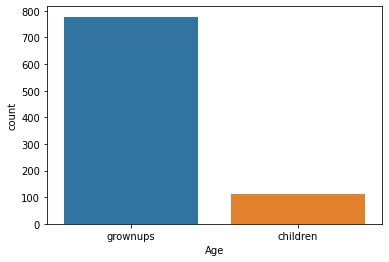

In [ ]:
#sns.countplot(x='Age', data=df1)

In [ ]:
#df1['who'] = np.where(df1['Age']<= 18.0 & df1['sex']==male, 'children', 'grownups')
#df1.head()

In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


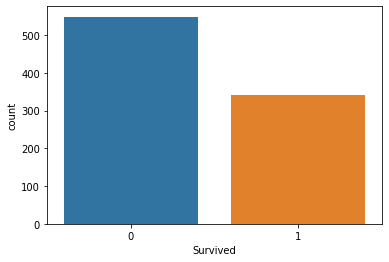

In [ ]:
#visualizing the training dataset of survived
sns.countplot(x ='Survived', data = df1)

In [ ]:
#df1['GrownupMale'] = df1['Sex']== male & df1['age']== grownups

#Grownupmales_subset= df1[(df1.Age=='grownups') & (df1.Sex=='male')]

#Grownupmales_subset.shape

(577, 12)

In [ ]:
#Grownupfemales_subset= df1[(df1.Age=='grownups') & (df1.Sex=='female')]

#Grownupfemales_subset.shape

(314, 12)

In [ ]:
#Malechildren_subset= df1[(df1.Age=='children') & (df1.Sex=='male')]

#Malechildren_subset.shape

(0, 12)

In [ ]:
#femalechildren_subset= df1[(df1.Age=='children') & (df1.Sex=='female')]

#femalechildren_subset.shape

(0, 12)

In [ ]:
#visualize the number of survivors against : who,sipsp,sex,sp,parch and embarked.
#create a new variable called cols to represent the list of columns that will be in my experiment.
cols= ['Who','SibSp','Sex','Parch', 'Embarked','Pclass']

In [ ]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
 12  cabin_null   714 non-null    int64  
 13  age_categ    714 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 83.7+ KB


In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [ ]:
df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df1['cabin_null']=np.where(df1['Cabin'].isnull(),1,0)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_categ
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q,1,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0,1


In [ ]:
#Converting the unordered categorical 'Sex'

df1.Sex=df1.Sex.map({'male':1,'female':0})
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df1['age_categ']=np.where(df1['Age']>=18,1,0)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categ
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
#concatenation of two columns can only happen if the are both of the same type string otherwise when they are of type int it will do addition
df1['who'] =df1['Sex'].astype(str) + df1['age_categ'].astype(str)

df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categ,who
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,01
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,01
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,01
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,11
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,01
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,00
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,11


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_categ
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.674523
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.468816
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# replace respective codes with their representations
df1.who=df1.who.map({'11':'Adult male','10':'Boy','01':'Adult female','00':'Girl'})
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categ,who
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Adult male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Adult female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,Adult female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,Adult male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,Adult male
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,Adult female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Girl
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,Adult male


In [ ]:
df1.groupby(['Survived']) ['cabin_null'].mean()

KeyError: ignored

In [ ]:
#df2 = pd.concat([df, df1], ignore_index=True, sort  = False)

In [ ]:
#df2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


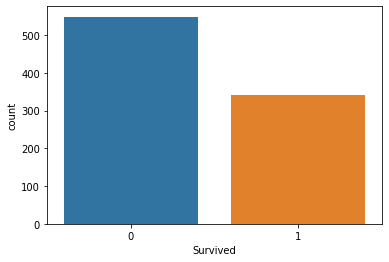

In [ ]:
#visualize the number of survived passengers
sns.countplot(df1['Survived'])

In [ ]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df1['Age' ].value_counts(dropna=False )

children    891
Name: Age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24c6e7ee10>,
      dtype=object)

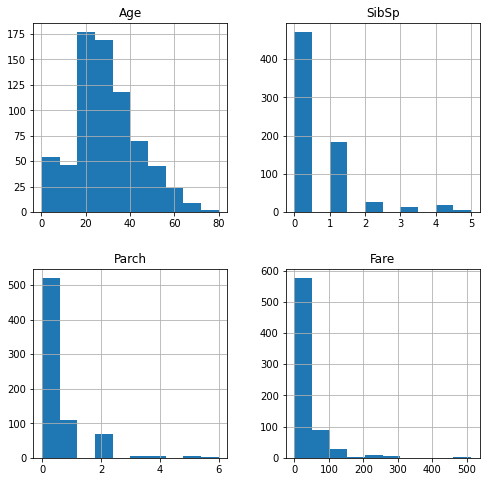

In [ ]:
# checking the data structure in form of hiatograms.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df1[['Age','SibSp','Parch','Fare']].hist(figsize=(8,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

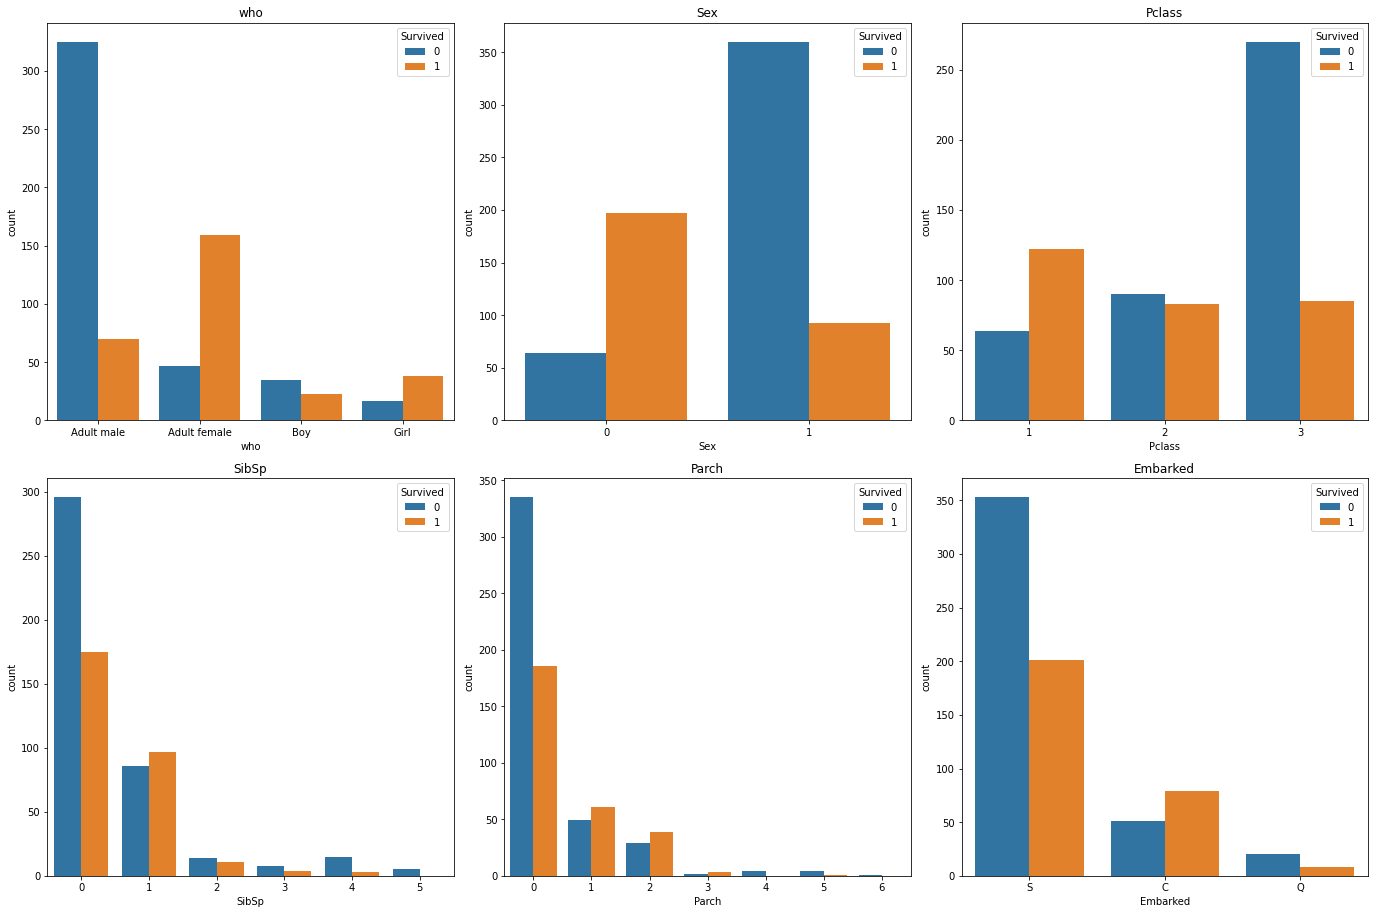

In [ ]:
col = ['who' ,'Sex' ,'Pclass' ,'SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3
#subplot grid and figure size of each graph
fig, axs =plt.subplots(n_rows,n_cols ,figsize =(n_cols*6.4, n_rows*6.4 ))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    ax=axs[r][c]
    sns.countplot(df1[col[i]],hue=df1['Survived'],ax=ax)
    ax.set_title(col[i])
    ax.legend(title='Survived',loc='upper right')
    plt.tight_layout()


In [ ]:
df1.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.754789
1,0.205298


In [ ]:
#look at survival rate by who and class
df1.pivot_table('Survived',index='Pclass', columns='who') 

who,Adult female,Adult male,Boy,Girl
Pclass,,,,
1,0.974026,0.371134,0.360000,0.941176
2,0.903226,0.068182,0.550000,1.000000
3,0.417910,0.133333,0.138686,0.571429


In [ ]:
#look at survival rate by who and class 
df1.pivot_table('Survived',index='Pclass', columns='who')

who,Adult female,Adult male,Boy,Girl
Pclass,,,,
1,0.974026,0.371134,0.360000,0.941176
2,0.903226,0.068182,0.550000,1.000000
3,0.417910,0.133333,0.138686,0.571429


In [ ]:
#look at survival rate by sex and class 

df1.pivot_table('Survived',index='Sex', columns='Pclass') 

Pclass,1,2,3
Sex,,,
0,0.968085,0.921053,0.500000
1,0.368852,0.157407,0.135447


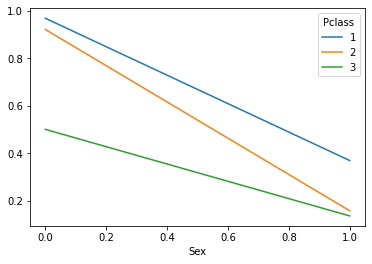

In [ ]:
#look at survival rate by sex and class visually

df1.pivot_table('Survived',index='Sex', columns='Pclass').plot()

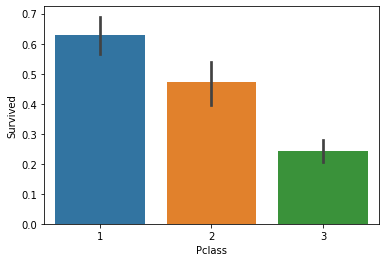

In [ ]:
#survival rate of each class
sns.barplot(x='Pclass', y ='Survived', data=df1)

In [ ]:
#look at survival rate by sex age and class in my case female are represented ny digit zero and male 1
age=pd.cut(df1['Age'],[0,18,80])
df1.pivot_table('Survived',['Sex',age],'Pclass')


Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.972973  0.900000  0.423729
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.375000  0.071429  0.133663

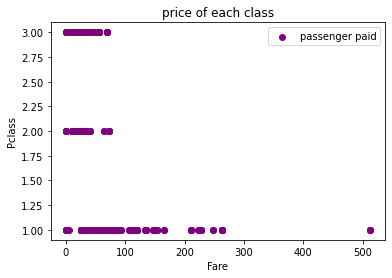

In [ ]:
#plot the price paid of each class
plt.scatter(df1['Fare'],df1['Pclass'],color ='purple' ,label ='passenger paid')
plt.ylabel('Pclass')
plt.xlabel('Fare')
plt.title('price of each class')
plt.legend()
plt.show()

In [ ]:
 #look at all the values in each column and get a count
 for val in df1:
     print(df1[val].value_counts())
 print()
 

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Ross, Mr. John Hugo                             1
Johannesen-Bratthammer, Mr. Bernt               1
Shelley, Mrs. William (Imanita Parrish Hall)    1
Clarke, Mrs. Charles V (Ada Maria Winfield)     1
Peduzzi, Mr. Joseph                             1
                                               ..
Zabour, Miss. Thamine                           1
Herman, Mrs. Samuel (Jane Laver)                1
Foo, Mr. Choong                                 1
Johnson, Mr. Alfred                             1
Rosblom, Mr. Viktor Richard                     1
Name: Name, Length: 891, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42 

In [ ]:
df1.drop(['Cabin','age_categ','Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Adult male
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,Adult female
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult female
3,4,1,1,0,35.0,1,0,113803,53.1000,S,Adult female
4,5,0,3,1,35.0,0,0,373450,8.0500,S,Adult male
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,S,Adult male
887,888,1,1,0,19.0,0,0,112053,30.0000,S,Adult female
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,S,Girl
889,890,1,1,1,26.0,0,0,111369,30.0000,C,Adult male


In [ ]:
df1=df1.dropna(subset=)

(712, 14)

In [ ]:
df1['Embarked' ].value_counts(dropna=False )

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
df1.shape

(712, 7)

In [ ]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
age_categ        int64
who             object
dtype: object

In [ ]:
 df1.drop(['Ticket','PassengerId','Cabin','Name','age_categ','Name'], axis=1 ,inplace=True)
 

In [ ]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who
0,0,3,1,22.0,1,0,7.2500,S,Adult male
1,1,1,0,38.0,1,0,71.2833,C,Adult female
2,1,3,0,26.0,0,0,7.9250,S,Adult female
3,1,1,0,35.0,1,0,53.1000,S,Adult female
4,0,3,1,35.0,0,0,8.0500,S,Adult male
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Adult male
887,1,1,0,19.0,0,0,30.0000,S,Adult female
888,0,3,0,NaN,1,2,23.4500,S,Girl
889,1,1,1,26.0,0,0,30.0000,C,Adult male


In [ ]:
df1=df1.dropna(subset=['Embarked' ,'Age'])

In [ ]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
who          object
dtype: object

In [ ]:
#count the new number of rows and columns in the dataset
df1.shape

(712, 9)

In [ ]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
who          object
dtype: object

In [ ]:
#print the unique values in the olumn who
print(df1['who'].unique())
#print the unique values in the column embarked
print(df1['Embarked'].unique())

['Adult male' 'Adult female' 'Boy' 'Girl']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import  LabelEncoder
labelencoder = LabelEncoder()
#Encode the embarked column
df1.iloc[:, 7]=labelencoder.fit_transform(df1.iloc[:,7].values)
#encode the who column 
df1.iloc[:, 8]=labelencoder.fit_transform(df1.iloc[:,8].values)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#print the unique values in the columns
print(df1['Sex'].unique())
print(df1['who'].unique())
print(df1['Fare'].unique())

[1 0]
[1 0 2 3]
[  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55    31.275    7.8542  16.      29.125   18.
  26.      13.       8.0292  35.5     31.3875 263.      27.7208  10.5
  82.1708  52.      11.2417   9.475   21.      41.5792   7.8792  17.8
  39.6875   7.8     76.7292  61.9792   7.2292  27.75    46.9     83.475
  27.9      8.1583   8.6625  73.5     14.4542  56.4958   7.65    29.
  12.475    9.       9.5     47.1     15.85    34.375   61.175   20.575
  34.6542  63.3583  23.       7.8958  77.2875   8.6542   9.825   14.4583
   7.75   247.5208   7.1417   6.975    7.05    14.5     15.0458  26.2833
   9.2167  79.2      6.75    11.5     36.75     7.7958  12.525   66.6
  61.3792   7.7333  16.1     15.75     7.775   20.525   33.5     30.6958
  28.7125   0.      39.      22.025   15.5    146.5208   8.4042   6.4958
   7.225   10.4625  18.7875  31.     113.275   27.      76.2917  90.
   9.35    13.5     26.25    12.275    7.125   52.5542  20

In [ ]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
who           int64
dtype: object

In [ ]:
#split the data into the independent'X' and dependent 'Y' variables.
X=df1.iloc[:,1:9 ].values
Y=df1.iloc[:,0].values

In [ ]:
#split our dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [ ]:
#create a function with many machine learning models
def models(X_train, Y_train):
  #use logistic regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)
  #use k-nearest neighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
  knn.fit(X_train,Y_train)
  #use svc (linear kernel)
  from sklearn.svm import SVC
  svc_lin =SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train,Y_train)
  #use svc(rbf kernel)
  from sklearn.svm import SVC
  svc_rbf =SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,Y_train)
  #use Gaussian=Naives-bayes
  from sklearn.naive_bayes import GaussianNB
  gauss =GaussianNB()
  gauss.fit(X_train,Y_train)
  #use decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
  tree.fit(X_train,Y_train)
  #Use the random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion= 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  #print the training accuracies
  print('[0]Logistic regression training accuracy: ', log.score(X_train,Y_train))
  print('[1]Knearest neighbors training accuracy: ', knn.score(X_train,Y_train))
  print('[2]SVC linear training accuracy: ', svc_lin.score(X_train,Y_train))
  print('[3]SVC RBF training accuracy: ', svc_rbf.score(X_train,Y_train))
  print('[4]Gaussian NB training accuracy: ', gauss.score(X_train,Y_train))
  print('[5]Decision tree training accuracy: ', tree.score(X_train,Y_train))
  print('[6]Random forest training accuracy: ', forest.score(X_train,Y_train))

  return log,knn,svc_lin, svc_rbf,gauss,tree,forest


In [ ]:
#get and train all the models
model= models(X_train,Y_train)

[0]Logistic regression training accuracy:  0.7978910369068541
[1]Knearest neighbors training accuracy:  0.8576449912126538
[2]SVC linear training accuracy:  0.7768014059753954
[3]SVC RBF training accuracy:  0.8506151142355008
[4]Gaussian NB training accuracy:  0.7978910369068541
[5]Decision tree training accuracy:  0.9929701230228472
[6]Random forest training accuracy:  0.9789103690685413


In [ ]:
#show the confusion matrix and acuracy for all the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm=confusion_matrix(Y_test,model[i].predict(X_test))
  #extract TN,FP,FNTP
  TN,FP,FN,TP=confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  test_score=(TP +TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [18 43]]
Model[1] Testing Accuracy = "0.7692307692307693"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[65 17]
 [19 42]]
Model[4] Testing Accuracy = "0.7482517482517482"

[[53 29]
 [12 49]]
Model[5] Testing Accuracy = "0.7132867132867133"

[[69 13]
 [17 44]]
Model[6] Testing Accuracy = "0.7902097902097902"



In [ ]:
#get the feature importance
forest=model[6]
importances = pd.DataFrame({'feature': df1.iloc[:, 1:9].columns, 'importance':np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending= False).set_index('feature')
importances

,importance
feature,
Age,0.298
Fare,0.278
who,0.118
Pclass,0.100
Sex,0.081
Parch,0.052
SibSp,0.046
Embarked,0.026


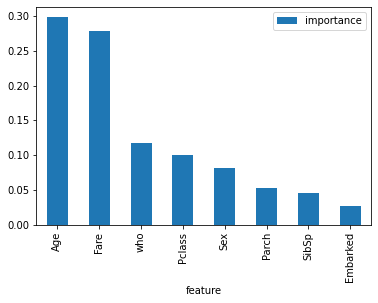

In [ ]:
#visualize features importances
importances.plot.bar()

In [ ]:
#print the prediction of the random forest classifier model
pred =model[6].predict(X_test)
print(pred)
print()
#print the actual values
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
#make predictions on i would have survived based on my dataset


my_survival=[[2,0,1,3,3,400,1,0]]
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
my_survival_scaled= sc.fit_transform(my_survival)
#print prediction of mysurvival using random forest classifier
pred = model[6].predict(my_survival_scaled)
print (pred)
if pred ==0:
 print('oh !snap you would not have made it')
else:
 print('cool!you survived')
                        

[0]
oh !snap you would not have made it
